# Economic calculation
Hydrogenerate allows computing the cost of different projects using the Hydropower Baseline Cost Modeling, Version 2 from Oak Ridge National Laboratory.

[Click here](https://idaholabresearch.github.io/HydroGenerate/Theory_5_CostOM.html) for a full list of projects that can be used, and to view the mathematical models used for cost calculation. 


In [2]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
urllib3.disable_warnings()
import sys
import os

sys.path.append(r"C:\python\HydroGenerate")  # Ensure HydroGenerate is found

# Import Hydrogenerate
from HydroGenerate.hydropower_potential import *

In [3]:
# 1) Cost and Annual O&M for resource_category =  'Non-PoweredDam'
# Economic calculation can be used while estimating hydropower, in Basic mode, as shown here.

flow = 8000 # cfs
head = 100 # ft
power = None

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            hydropower_type= 'Basic',
                            resource_category= 'NewStream-reach')

# Explore output
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))

UnboundLocalError: cannot access local variable 'icc' where it is not associated with a value

In [3]:
# 2) resource_category: 'Non-PoweredDam'
# Economic calculation can be used without estimating hydropower, by providing only head and power.

head = 104 # ft
power = 20500 # kW

hp = calculate_hp_potential(rated_power= power, head= head,
                           hydropower_type= None, 
                           resource_category= 'Non-PoweredDam')

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))


Resource Category: Non-PoweredDam
Initial Capital Cost (M$): 71.9
Annual Operation and Maintennance (M$): 1.2


In [4]:
# 3) Annual energy generated and revenue
# Economic calculation can be used while estimating hydropower, in Basic mode, as shown here.
# If a capacity factor is known, can be used to estimate annual energy generated by setting annual_calculation = True

flow = 8000 # cfs
head = 20 # ft

# the price of electricty can be varied by using the line of code below and the line of code commented out 
# in the fucntion call
# electricity_sell_price= 0.2 # Units: $/KW

hp = calculate_hp_potential(flow= flow, head= head, penstock_length= 50, 
                           hydropower_type= 'Diversion', 
                           annual_caclulation= True, 
                        #    electricity_sell_price= electricity_sell_price,
                           capacity_factor= 0.5)


# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Rated Power (MW):', round(hp.rated_power / 1000, 2))

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))

print('\nAnnual energy generated (MwH):', round(hp.annual_energy_generated / 1000, 0))
print('Number of days a year the plant operates:', hp.n_operation_days)
print('Annual revenue (M$):', round(hp.annual_revenue, 1))


Design flow (cfs): 8000.0
Rated Power (MW): 12.1

Resource Category: NEWSTREAM-REACH
Initial Capital Cost (M$): 75.2
Annual Operation and Maintennance (M$): 0.9

Annual energy generated (MwH): 39695.0
Number of days a year the plant operates: 182.5
Annual revenue (M$): 2.3


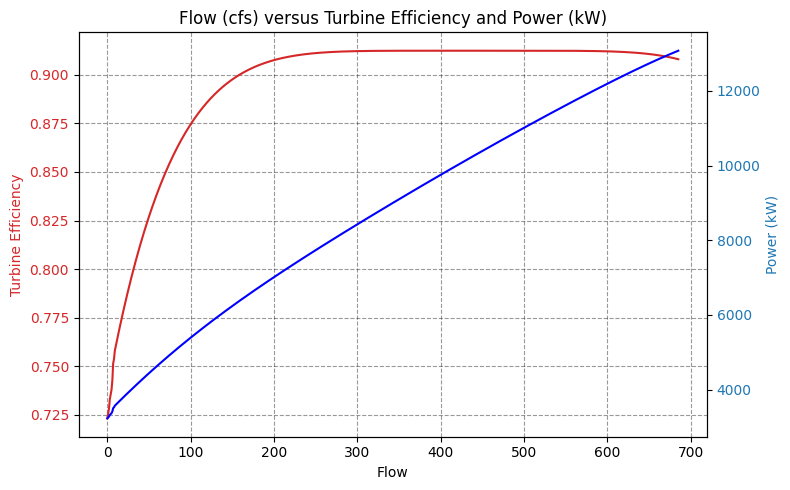

In [ ]:
# Turbine efficiency and power as a function of flow
sys.path.append('/c:/python/HydroGenerate/HydroGenerate')
flow_efficiency_power_plot(hp)

In [4]:
# Economic calculation wiht hydropower

flow = pd.read_csv('data_test.csv') # pandas data frame
flow['dateTime'] = pd.to_datetime(flow['dateTime']) # preprocessing convert to datetime
flow = flow.set_index('dateTime') # set datetime index # flolw is in cfs

head = 20 # ft
penstock_length = 30 # ft
hp_type = 'Diversion' 


hp = calculate_hp_potential(flow= flow, head= head,
                            penstock_headloss_calculation= True,
                            design_flow= None,
                            electricity_sell_price = 0.05,
                            hydropower_type= hp_type, penstock_length= penstock_length,
                            flow_column= 'discharge_cfs', annual_caclulation= True,
                            resource_category= 'Non-PoweredDam'
                            )

pd.set_option('display.max_columns', 10) # 
pd.set_option('display.width', 1000)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

# Economic parameters
print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))


Design flow (cfs): 9620.0
Head_loss at design flow (ft): 1.91
Turbine type: Kaplan
Rated Power (Kw): 13178.88
Net head (ft): 18.09
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 30.0
Penstock diameter (ft): 16.11
Runner diameter (ft): 19.08

Resource Category: Non-PoweredDam
Initial Capital Cost (M$): 71.0
Annual Operation and Maintennance (M$): 0.9
